Copyright 2019 The TensorFlow Authors

Derived from <a href="https://github.com/lmoroney/dlaicourse/blob/master/Course%201%20-%20Part%206%20-%20Lesson%202%20-%20Notebook.ipynb">this notebook</a>

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D as Conv, Dense, Flatten, MaxPooling2D as MaxPooling)
from tensorflow.keras.models import Model, Sequential
from tensorflow.nn import relu, softmax

In [3]:
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.
X_test = X_test / 255.

In [8]:
dim = X_train.shape[1]
dim

28

In [10]:
N_CLASSES = len(set(y_train))
N_CLASSES

10

In [13]:
mod = Sequential([Flatten(), 
                  Dense(dim * dim, activation=relu),
                  Dense(N_CLASSES, activation=softmax)])
mod.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])
mod.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4731 - accuracy: 0.8293
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3611 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3223 - accuracy: 0.8817
Epoch 4/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2984 - accuracy: 0.8889
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2792 - accuracy: 0.8965


In [14]:
test_loss = mod.evaluate(X_test, y_test)

313/313 [==============================] - 0s 736us/step - loss: 0.3486 - accuracy: 0.8738


In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, dim, dim, 1)
X_train = X_train / 255.
X_test = X_test.reshape(10000, dim, dim, 1)
X_test = X_test / 255.

In [19]:
KERNEL = (3, 3)
POOL = (2, 2)
mod = Sequential([
    Conv(64, KERNEL, activation='relu', input_shape=(dim, dim, 1)),
    MaxPooling(POOL),
    Conv(64, KERNEL, activation='relu'),
    MaxPooling(POOL),
    Flatten(),
    Dense(dim * dim, activation='relu'),
    Dense(N_CLASSES, activation='softmax')])
mod.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy'])
mod.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.4108 - accuracy: 0.8497
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2717 - accuracy: 0.8996
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2255 - accuracy: 0.9158
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.1899 - accuracy: 0.9279
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1597 - accuracy: 0.9396


In [20]:
mod.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 784)               1255184   
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [21]:
mod.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2424 - accuracy: 0.9126


[0.2423679381608963, 0.9125999808311462]

In [44]:
IM1 = 4
IM2 = 5
IM3 = 6
CONV_N = 2

layer_out = [layer.output for layer in mod.layers]
activation_mod = Model(inputs=mod.input, outputs=layer_out)

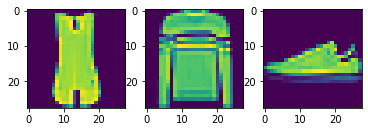

In [45]:
plt.subplot(131)
plt.imshow(X_train[IM1]);
plt.subplot(132)
plt.imshow(X_train[IM2]);
plt.subplot(133)
plt.imshow(X_train[IM3]);

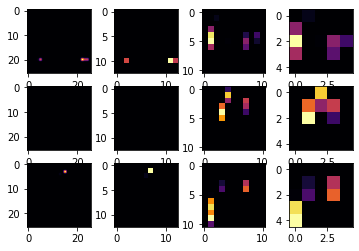

In [46]:
f, axarr = plt.subplots(3, 4)
for x in range(4):
    for i, im in enumerate([IM1, IM2, IM3]):
        f = activation_mod.predict(X_test[im].reshape(1, dim, dim, 1))[x]
        axarr[i, x].imshow(f[0, :, :, CONV_N], cmap='inferno')
        axarr[i, x].grid(False)